In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import tensorflow as tf

In [34]:
from sklearn.model_selection import train_test_split

### Data preprocessing

In [35]:
df = pd.read_csv('NIC.csv')

In [36]:
df

,IDN
0,911232910V
1,937370580V
2,937784210V
3,940491240V
4,942251610V
...,...
5018,988190969V
5019,988330809V
5020,988501069V
5021,995150549V


In [37]:
df['input'] = df['IDN'].str[0:8] # taking the first 8 digits

In [38]:
df['output'] = df['IDN'].str[8] # taking the output


In [39]:
# seperate input string to single component
df['a'] = df['IDN'].str[0]
df['b'] = df['IDN'].str[1]
df['c'] = df['IDN'].str[2]
df['d'] = df['IDN'].str[3]
df['e'] = df['IDN'].str[4]
df['f'] = df['IDN'].str[5]
df['g'] = df['IDN'].str[6]
df['h'] = df['IDN'].str[7]

### Data Cleaning process

In [40]:
def data_cleaning(row):
    val_char = ['0','1','2','3','4','5','6','7','8','9']
    columns = ['output','a','b','c','d','e','f','g','h']
    validation = 'valid'
    for i in columns:
        if not row[i] in val_char:
            validation = 'invalid'
    return validation

In [41]:
df['data_validation'] = df.apply(data_cleaning,axis = 1)
df = df[df['data_validation'] == 'valid']
df['output'] = df['output'].astype('int')

C:\Users\HP\anaconda3\envs\TFOD\lib\site-packages\pandas-1.3.0-py3.8-win-amd64.egg\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [42]:
df

,IDN,input,output,a,b,c,d,e,f,g,h,data_validation
0,911232910V,91123291,0,9,1,1,2,3,2,9,1,valid
1,937370580V,93737058,0,9,3,7,3,7,0,5,8,valid
2,937784210V,93778421,0,9,3,7,7,8,4,2,1,valid
3,940491240V,94049124,0,9,4,0,4,9,1,2,4,valid
4,942251610V,94225161,0,9,4,2,2,5,1,6,1,valid
...,...,...,...,...,...,...,...,...,...,...,...,...
5018,988190969V,98819096,9,9,8,8,1,9,0,9,6,valid
5019,988330809V,98833080,9,9,8,8,3,3,0,8,0,valid
5020,988501069V,98850106,9,9,8,8,5,0,1,0,6,valid
5021,995150549V,99515054,9,9,9,5,1,5,0,5,4,valid


### Data transformation

In [43]:
number_of_rows = len(df.index)

In [44]:
X = df[['a','b','c','d','e','f','g','h']].to_numpy(dtype = 'float32')

In [45]:
X = np.reshape(X, (number_of_rows,8))/10 # data normalization

In [46]:
y = df['output'].to_numpy(dtype = 'float32')

In [47]:
y = y.reshape(number_of_rows,1)

In [48]:
y = tf.keras.utils.to_categorical(y)

In [49]:
X

array([[0.9, 0.1, 0.1, ..., 0.2, 0.9, 0.1],
       [0.9, 0.3, 0.7, ..., 0. , 0.5, 0.8],
       [0.9, 0.3, 0.7, ..., 0.4, 0.2, 0.1],
       ...,
       [0.9, 0.8, 0.8, ..., 0.1, 0. , 0.6],
       [0.9, 0.9, 0.5, ..., 0. , 0.5, 0.4],
       [0.9, 0.9, 0.5, ..., 0.1, 0.6, 0.4]], dtype=float32)

In [50]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100) # traiin test split

### Model

In [52]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10,input_dim=8,activation='relu'))
model.add(tf.keras.layers.Dense(10,input_dim=10,activation='relu'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "categorical_crossentropy",optimizer = 'adam',metrics = ['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________


In [54]:
epochs = 1000

In [55]:

history = model.fit(X_train,y_train,epochs = epochs,verbose = 0, validation_data= (X_test,y_test), batch_size = 512 )

### Model evaluation

#### Testing accuracy

In [56]:
model.evaluate(X_test, y_test)[1]

32/32 [==============================] - 0s 3ms/step - loss: 2.2894 - accuracy: 0.1725


0.17248255014419556

#### Training accuracy

In [57]:
model.evaluate(X_train, y_train)[1]

126/126 [==============================] - 0s 2ms/step - loss: 2.2334 - accuracy: 0.1944


0.19436128437519073

### performance visualization

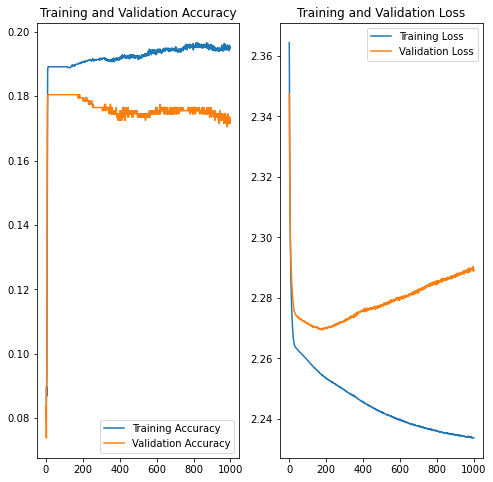

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Finding check digits for the given NIC numbers

a. 54178341 ,
b. 51782160 ,
c. 94693202 ,
d. 87352340 ,
e. 90705025

In [59]:
X_new = [[5,4,1,7,8,3,4,1],[5,1,7,8,2,1,6,0],[9,4,6,9,3,2,0,2],[8,7,3,5,2,3,4,0],[9,0,7,0,5,0,2,5]]

In [60]:
X_new = np.reshape(X_new, (5,8))/10

In [61]:
X_new

array([[0.5, 0.4, 0.1, 0.7, 0.8, 0.3, 0.4, 0.1],
       [0.5, 0.1, 0.7, 0.8, 0.2, 0.1, 0.6, 0. ],
       [0.9, 0.4, 0.6, 0.9, 0.3, 0.2, 0. , 0.2],
       [0.8, 0.7, 0.3, 0.5, 0.2, 0.3, 0.4, 0. ],
       [0.9, 0. , 0.7, 0. , 0.5, 0. , 0.2, 0.5]])

In [62]:
for i,y in enumerate(model.predict(X_new)):
    print(X_new[i])
    print(y)
    print(np.argmax(y))
    print('\n')

[0.5 0.4 0.1 0.7 0.8 0.3 0.4 0.1]
[0.1141455  0.1370481  0.04279486 0.10274357 0.07145969 0.1480094
 0.10976969 0.10917061 0.05036069 0.11449795]
5


[0.5 0.1 0.7 0.8 0.2 0.1 0.6 0. ]
[0.22089131 0.07377604 0.0742535  0.1004984  0.07175717 0.08917109
 0.1099422  0.09512021 0.09226218 0.07232793]
0


[0.9 0.4 0.6 0.9 0.3 0.2 0.  0.2]
[0.20177157 0.11921007 0.1065856  0.07576714 0.06423429 0.08679319
 0.09434833 0.08800041 0.10193415 0.06135526]
0


[0.8 0.7 0.3 0.5 0.2 0.3 0.4 0. ]
[0.15887854 0.09442534 0.0738446  0.0936646  0.1112331  0.09709019
 0.08968977 0.10712475 0.08604683 0.08800227]
0


[0.9 0.  0.7 0.  0.5 0.  0.2 0.5]
[0.19861908 0.07869474 0.07505085 0.11642282 0.06534517 0.097978
 0.12205609 0.08784953 0.08957855 0.06840514]
0


